In [ ]:
from google.colab import files
info = files.upload()

Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df. head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


=> we see the average age is around 39, and the credit score ranges from 350 to 850.

In [ ]:
df.shape

(10000, 12)

=> the size of the dataset (10000 rows, 12 columns).

In [ ]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


=> there are no missing values in this dataset

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns=['customer_id'],axis=1,inplace=True) #we don't need this column for modeling

=> Customer ID is typically dropped because it's a unique identifier and usually doesn't provide predictive value for a churn model.


In [ ]:
df.describe(include=['object'])

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


=>  it analyzes country (3 unique values, France is most frequent) and gender (2 unique values, Male is most frequent).

In [ ]:
df['gender'].value_counts()

,count
gender,
Male,5457
Female,4543


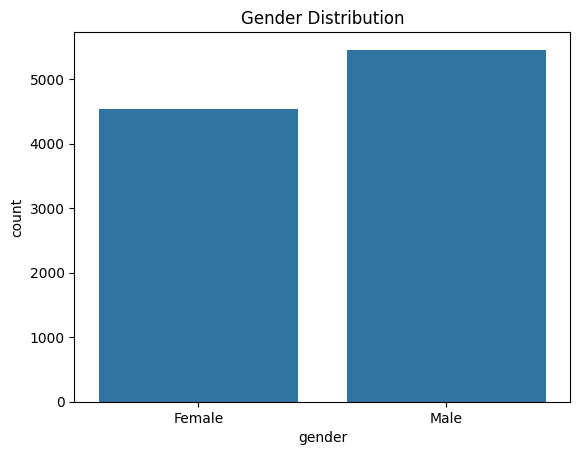

In [ ]:
# Gender distribution
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [ ]:
df['country'].value_counts()

,count
country,
France,5014
Germany,2509
Spain,2477


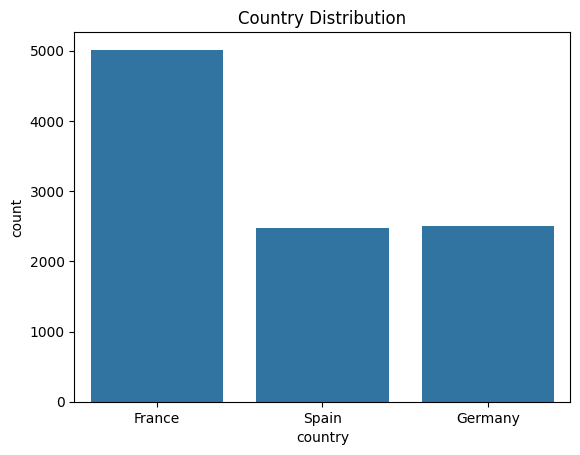

In [ ]:
# Country distribution
sns.countplot(x='country', data=df)
plt.title('Country Distribution')
plt.show()

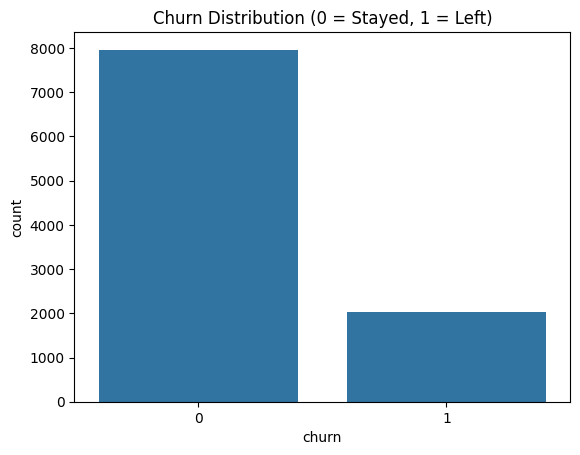

In [ ]:
# Churn distribution
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution (0 = Stayed, 1 = Left)')
plt.show()

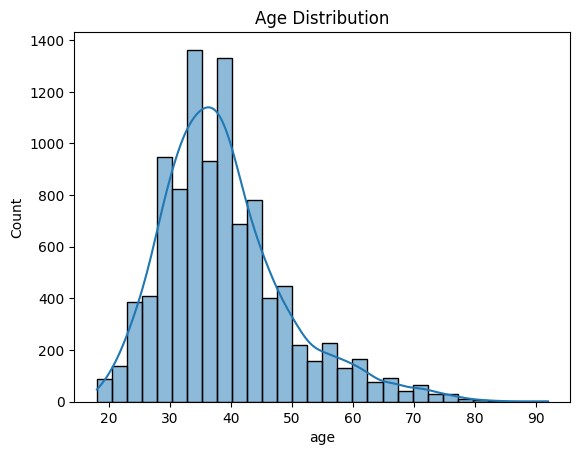

In [ ]:
# Age distribution
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

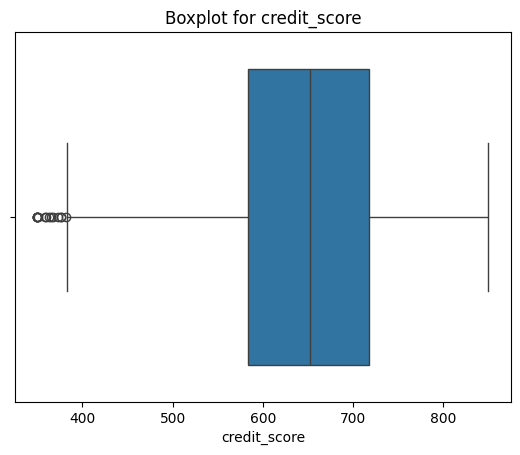

In [ ]:
sns.boxplot(x=df['credit_score'])
plt.title("Boxplot for credit_score")
plt.show()

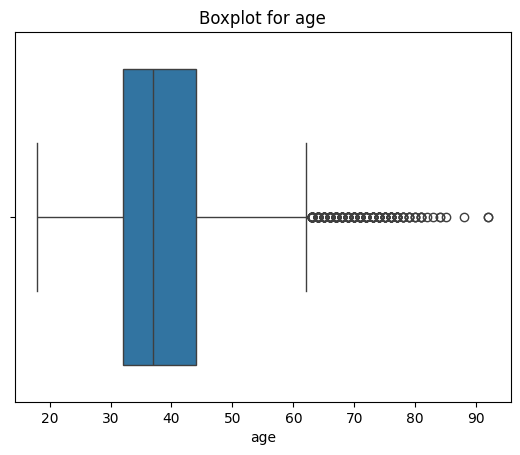

In [ ]:
sns.boxplot(x=df['age'])
plt.title("Boxplot for age")
plt.show()

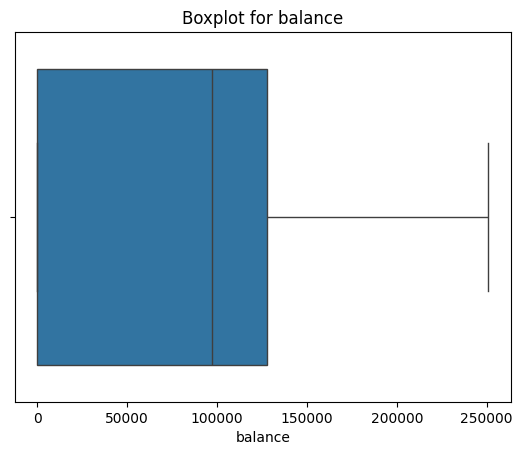

In [ ]:
sns.boxplot(x=df['balance'])
plt.title("Boxplot for balance")
plt.show()

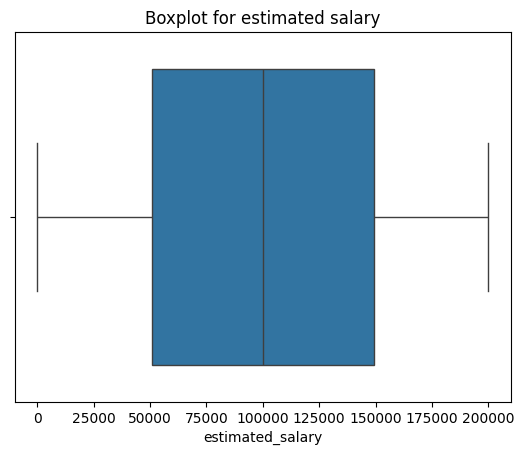

In [ ]:
sns.boxplot(x=df['estimated_salary'])
plt.title("Boxplot for estimated salary")
plt.show()

Univariate Analysis

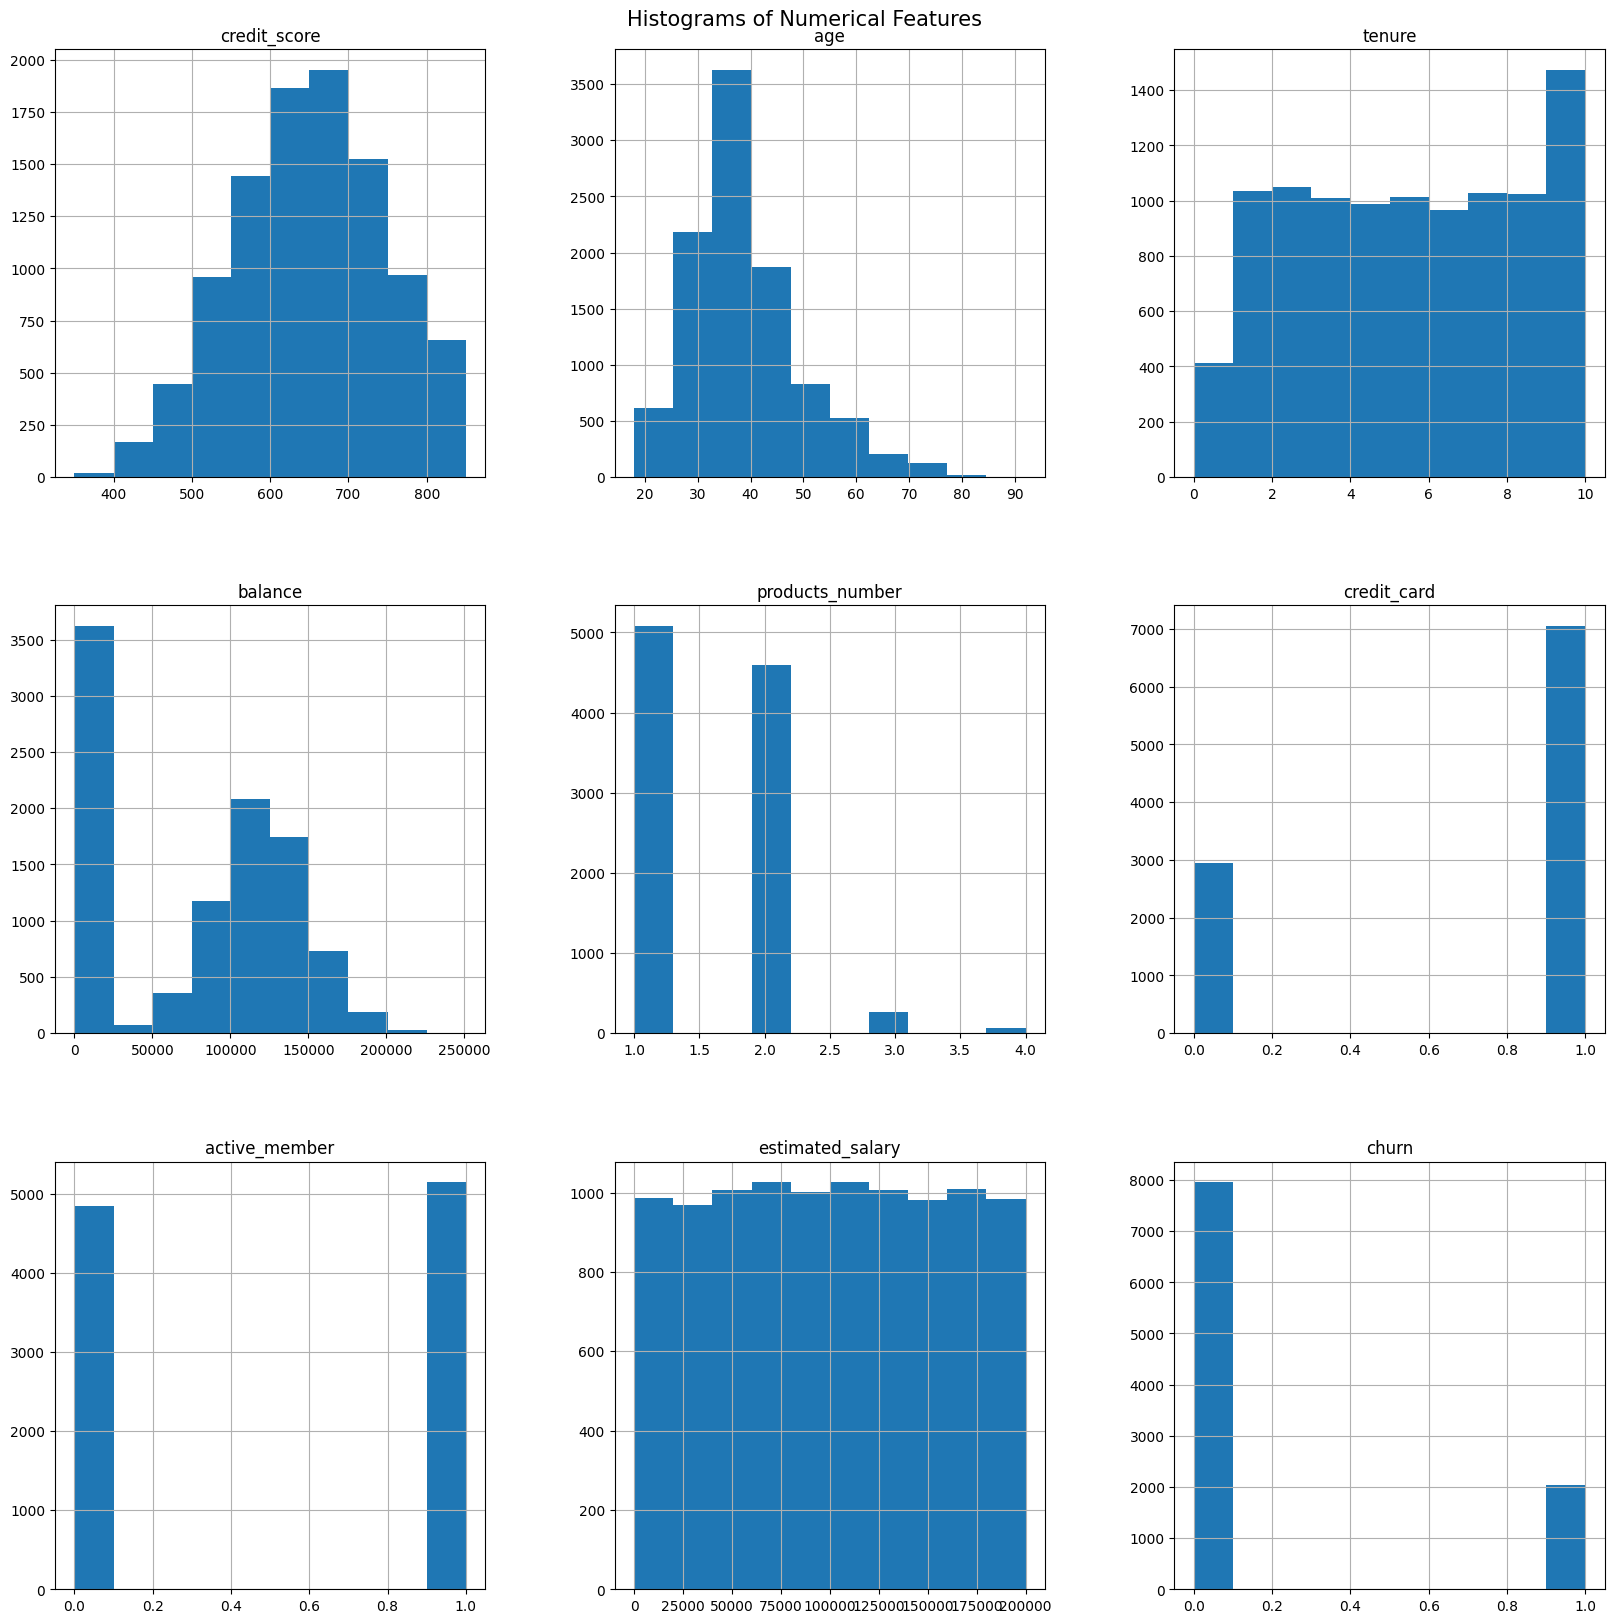

In [ ]:
# Histograms for numerical variables
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
df[numerical_features].hist(figsize=(20, 20))
plt.suptitle("Histograms of Numerical Features", y=0.9, fontsize=15)
plt.show()

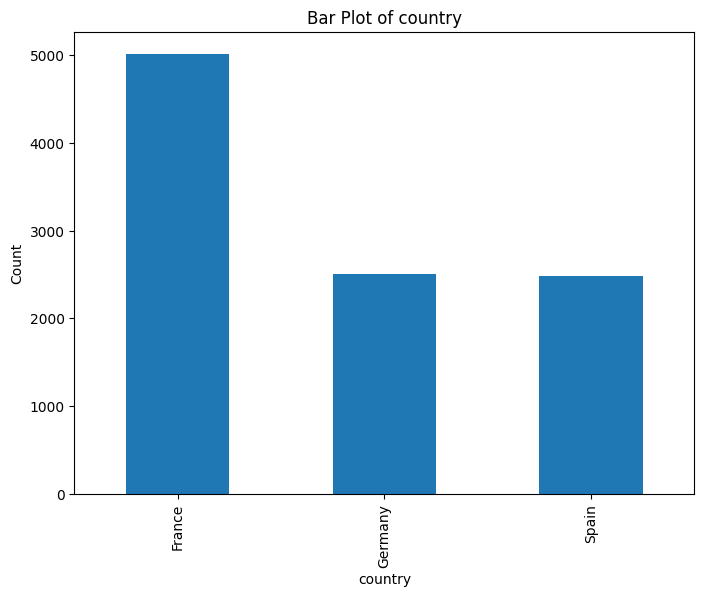

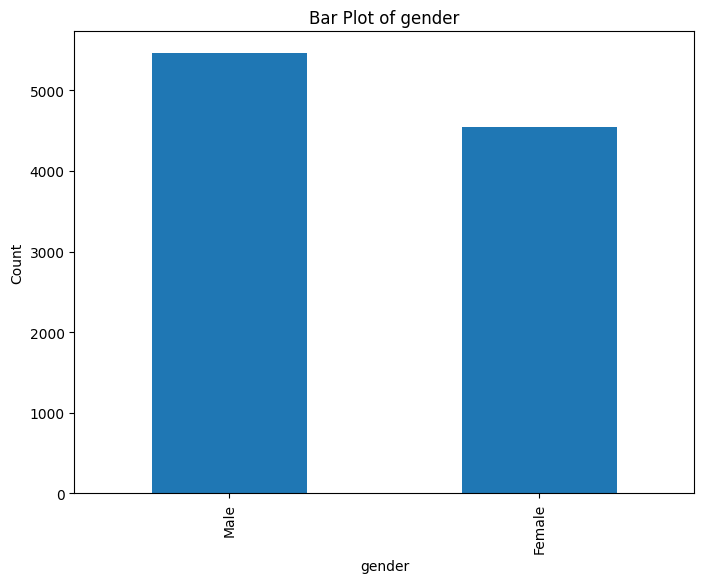

In [ ]:
# Bar Plots for categorical variables
categorical_features = df.select_dtypes(include='object').columns.tolist()
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
print("\n")

Bivariate Analysis

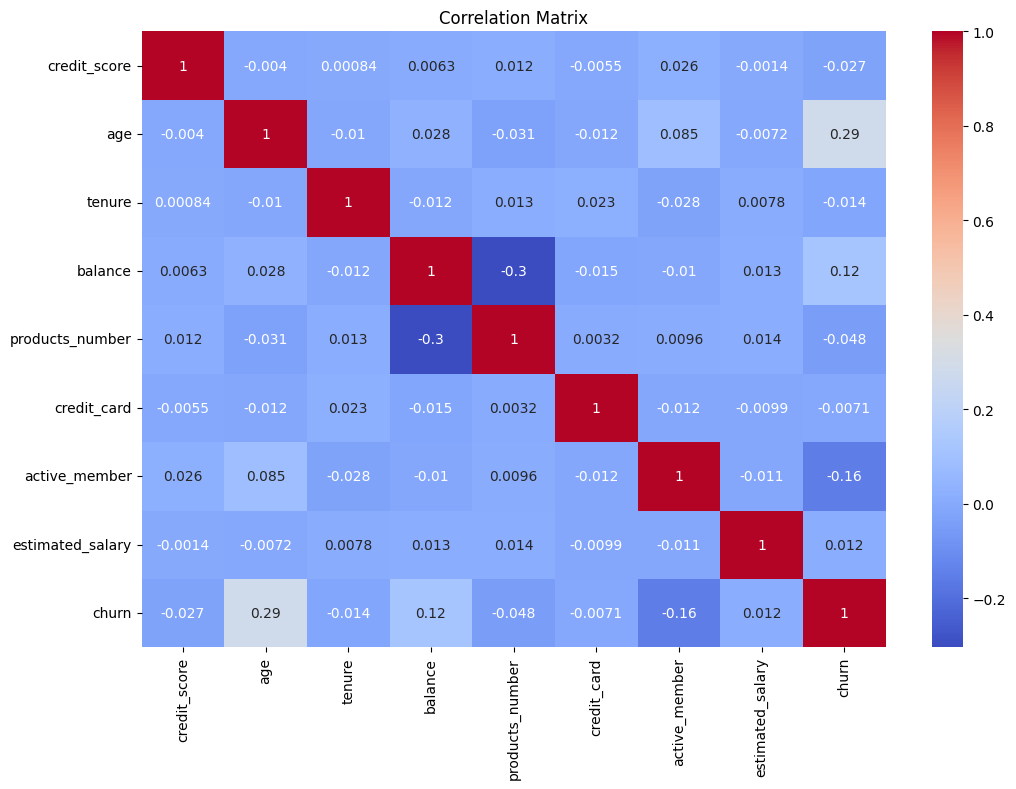

In [ ]:
# Correlation matrix
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

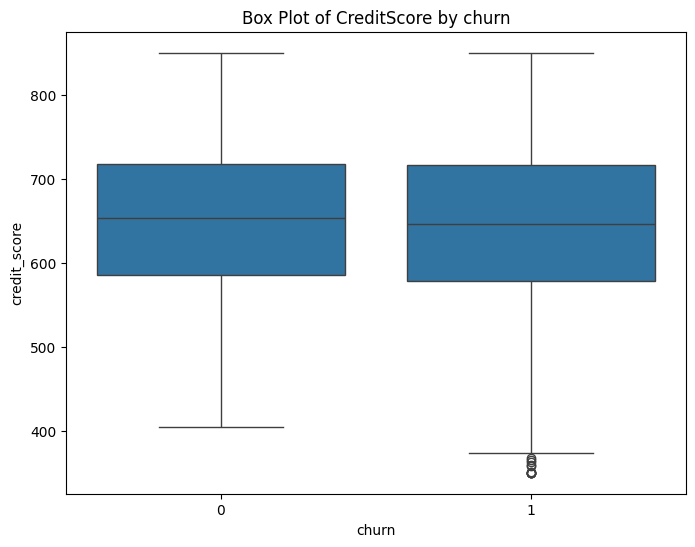

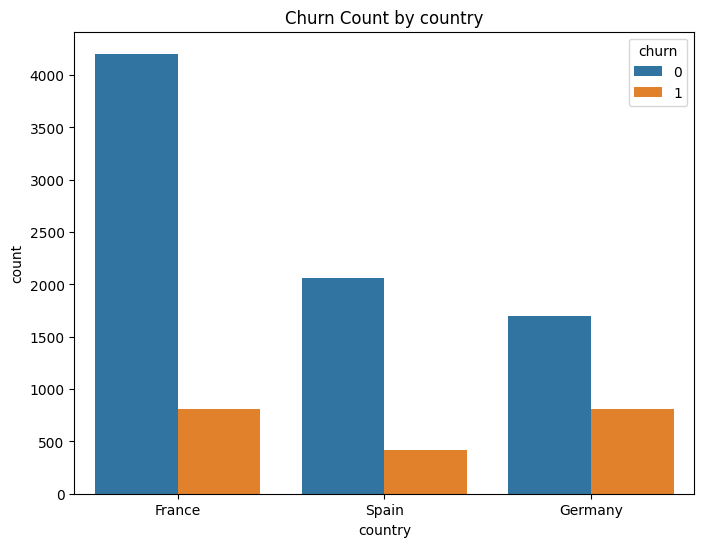

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='credit_score', data=df)
plt.title('Box Plot of CreditScore by churn')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='country', hue='churn', data=df)
plt.title('Churn Count by country')
plt.show()
print("\n")

Encoding Categorical Variables

In [ ]:
# Label encoding for binary categorical variables
df['gender'] = LabelEncoder().fit_transform(df['gender'])

=> converts the categorical 'gender' column (Male/Female) into numerical labels (e.g., 0 and 1) using LabelEncoder.

In [ ]:
# One-hot encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['country'], drop_first=True)

Outlier Handling (using IQR method)

In [ ]:
def remove_outliers_iqr(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

numerical_cols_for_outlier_handling = ['credit_score', 'age', 'balance', 'estimated_salary']
original_len = len(df)
for col in numerical_cols_for_outlier_handling:
    df = remove_outliers_iqr(df, col)
print(f"Outlier handling removed {original_len - len(df)} rows")

Outlier handling removed 374 rows


Feature Scaling

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('churn')  # Exclude 'churn' from scaling
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
# Define target and features
X = df.drop(columns=['churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=19)

In [ ]:
y_train.head()

,churn
8206,0
591,0
6766,1
9359,1
4049,0
